In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("seaborn")

In [2]:
theYear = 2018
year = pd.DataFrame()
for i in range(12):
    theMonth = i+1
    if(theMonth < 10):
        theMonth = "0"+str(theMonth)
    else:
        theMonth = str(theMonth)
    month = pd.read_csv("marginal_emission/SGIP_CAISO_SDGE/SGIP_CAISO_SDGE_{}-{}_ALL_MOER_VERSIONS.csv".format(theYear,theMonth),parse_dates=['timestamp'])
    year = pd.concat([year, month], axis=0)

In [3]:
print(month.dtypes)

timestamp           datetime64[ns, UTC]
MOER version 2.0                float64
MOER version 1.0                float64
dtype: object


<AxesSubplot:xlabel='timestamp'>

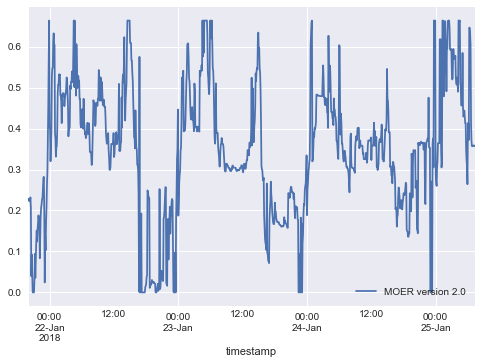

In [4]:
q1 = year[6000:7000]
q1.plot(x="timestamp", y="MOER version 2.0")

In [5]:
def isLeapYr(theYear):
    if ((theYear % 4 == 0) and (theYear % 100 != 0)) or (theYear % 400 == 0):
        return 366
    else:
        return 365

In [6]:
# Create Heatmap
if isLeapYr(theYear)==True:
    day = 366
else:
    day = 365
time = 12*24
matrix = np.zeros(day*time,dtype=float)

MOERV2 = 1

plt.figure(figsize=(time,day))

for i in range (day):
    for j in range (time):
        MOER = year.iloc[int(i*time+j),MOERV2]
        #print(i*time+j)
        #print(MOER)
#         #print(year[i*time+j:i*time+j+1]['MOER version 2.0'].astype(float))
#         #MOER = year[i*time+j:i*time+j+1]['MOER version 2.0'].astype(float)
#         MOER = year[i*time+j:i*time+j+1]['MOER version 2.0']
#         MOER = str(MOER)[5:13]
#         print(MOER)
#         if(MOER=='0.0'):
#             MOER = 0
#         MOER = float(MOER)
        matrix[i*time+j] = MOER

<Figure size 20736x26280 with 0 Axes>

In [7]:
matrix = matrix.reshape(day,time)
# print(matrix)

In [9]:
theIndex = np.zeros(time,dtype=object)
for i in range(time):
    minute = (i*5)%60
    if minute < 10:
        minute = "0"+str(minute)
    hour = int(i/12)
    if hour < 10:
        hour = "0"+str(hour)
    
    hour = str(hour)
    minute = str(minute)
    timeStr = hour+":"+minute
    theIndex[i] = timeStr
    
theColumn = np.zeros(day,dtype=object)
if isLeapYr(theYear)==True:
    month_arr = [31,29,31,30,31,30,31,31,30,31,30,31]
else:
    month_arr = [31,28,31,30,31,30,31,31,30,31,30,31]

month_idx = 1
day_elapse = 1
for i in range(day):
    if day_elapse > month_arr[month_idx-1]:
        month_idx += 1
        day_elapse = 1
        
    if month_idx < 10:
        month = "0"+(str(month_idx))
    else:
        month = str(month_idx)
    
    if day_elapse < 10:
        day_idx = "0"+(str(day_elapse))
    else:
        day_idx = str(day_elapse)
        
    theColumn[i] = (str(theYear)) +"-"+ month +"-"+ day_idx
    day_elapse += 1

theColumn = theColumn.tolist()
theIndex = theIndex.tolist()
# print(theIndex)
# print(theColumn)

In [10]:
matrix = pd.DataFrame(matrix, columns=theIndex,index=theColumn)
matrix.T

,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,2018-12-27,2018-12-28,2018-12-29,2018-12-30,2018-12-31
00:00,0.288456,0.261050,0.335777,0.276677,0.345312,0.352363,0.205788,0.329946,0.489279,0.304855,...,0.201240,0.195445,0.204863,0.175878,0.180015,0.245107,0.293819,0.243134,0.230526,0.154538
00:05,0.288998,0.236604,0.344462,0.322881,0.337920,0.319079,0.205014,0.315418,0.519779,0.325000,...,0.214858,0.202958,0.173561,0.155727,0.164140,0.224565,0.262363,0.207758,0.189700,0.159256
00:10,0.292090,0.240545,0.349673,0.453333,0.349443,0.320415,0.202811,0.323465,0.632912,0.331847,...,0.189948,0.212827,0.183494,0.152638,0.178537,0.211803,0.220793,0.217995,0.198786,0.177419
00:15,0.299231,0.241639,0.358335,0.396116,0.465349,0.294697,0.228306,0.335202,0.599971,0.347474,...,0.212661,0.219440,0.208643,0.167127,0.182679,0.239125,0.266407,0.245483,0.204514,0.185699
00:20,0.302720,0.254350,0.373487,0.407428,0.331019,0.303278,0.229767,0.370418,0.663750,0.368875,...,0.221346,0.227843,0.211997,0.179517,0.205103,0.245596,0.268538,0.262435,0.207649,0.188622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:35,0.443871,0.441452,0.663750,0.468430,0.326504,0.387526,0.663750,0.527339,0.284499,0.269948,...,0.234118,0.200967,0.188286,0.109363,0.288964,0.328636,0.257071,0.191181,0.174098,0.227049
23:40,0.579499,0.494731,0.663750,0.469477,0.663750,0.387526,0.663750,0.526836,0.309036,0.326753,...,0.243457,0.209220,0.193120,0.131638,0.297867,0.328636,0.290354,0.234792,0.183979,0.239506
23:45,0.513377,0.527417,0.663750,0.567721,0.663750,0.378711,0.663750,0.636532,0.314080,0.298484,...,0.257696,0.248380,0.205831,0.175943,0.337011,0.355108,0.338861,0.287019,0.192121,0.271948
23:50,0.587815,0.528438,0.663750,0.552263,0.608637,0.402403,0.663750,0.663750,0.347188,0.365300,...,0.260834,0.278708,0.199444,0.232967,0.330682,0.363365,0.353074,0.287019,0.192993,0.303090


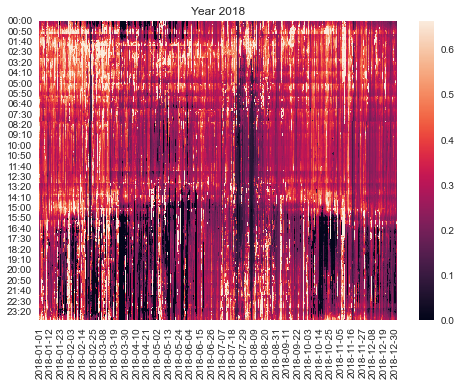

In [16]:
# month.plot(x="timestamp", y=["MOER version 2.0", "MOER version 1.0"])
yearplt = plt.axes()
heat_map = sns.heatmap(matrix.T)
yearplt.set_title('Year {}'.format(theYear))
plt.savefig("./plots/marginal_emission_heatmap{}.png".format(theYear))
plt.show()

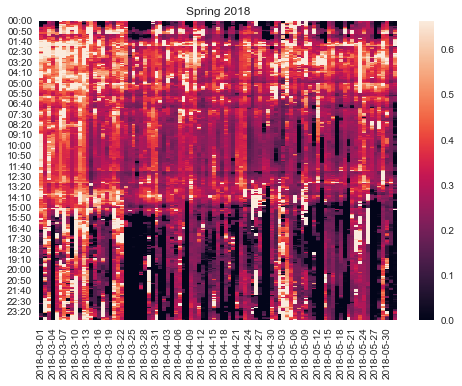

In [12]:
# Analyze Different Season
# spring = df2[59:152].mean().iloc[1:]
# summer = df2[152:243].mean().iloc[1:]
# autumn = df2[243:334].mean().iloc[1:]
# winter = pd.concat([df2[334:365],df2[0:59]]).mean().iloc[1:]

spring = matrix.loc[:][59:152].T
summer = matrix.loc[:][152:243].T
autumn = matrix.loc[:][243:334].T
winter = pd.concat([matrix[334:365],matrix[0:59]]).T

springPlt = plt.axes()
heat_map_spring = sns.heatmap(spring)
springPlt.set_title('Spring {}'.format(theYear))
plt.savefig("./plots/marginal_emission_heatmap{}_spring.png".format(theYear))
plt.show()


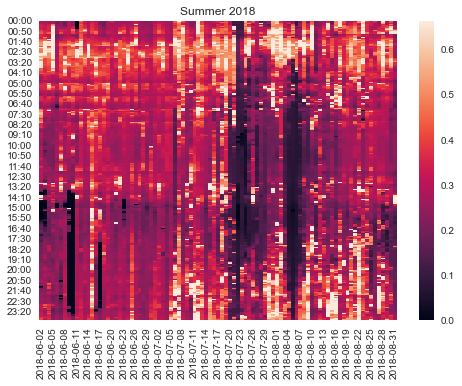

In [13]:
summerPlt = plt.axes()
summerPlt.set_title('Summer {}'.format(theYear))
heat_map_summer = sns.heatmap(summer)
plt.savefig("./plots/marginal_emission_heatmap{}_summer.png".format(theYear))
plt.show()

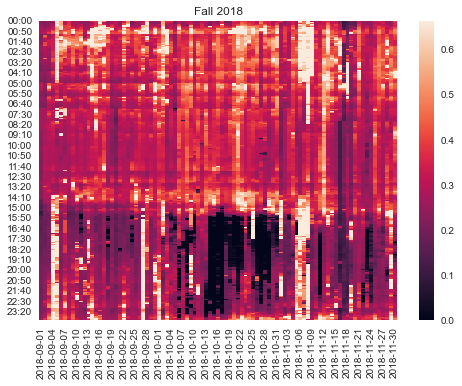

In [14]:
fallPlt = plt.axes()
heat_map_autumn = sns.heatmap(autumn)
fallPlt.set_title('Fall {}'.format(theYear))
plt.savefig("./plots/marginal_emission_heatmap{}_fall.png".format(theYear))
plt.show()

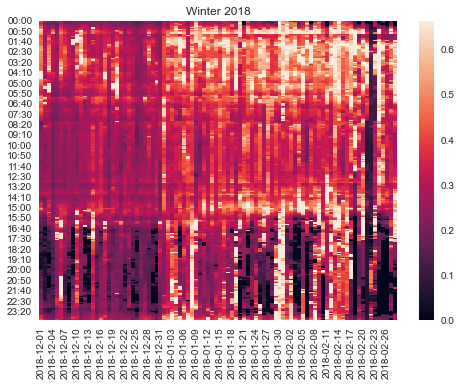

In [15]:
winterPlt = plt.axes()
heat_map_winter = sns.heatmap(winter)
winterPlt.set_title('Winter {}'.format(theYear))
plt.savefig("./plots/marginal_emission_heatmap{}_winter.png".format(theYear))
plt.show()